In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import measure
from skimage import io
from skimage.filters import threshold_otsu
from skimage import feature
from skimage.color import rgb2gray
from skimage import filters
import skimage.morphology
import scipy as sp
from skimage import segmentation, filters



In [18]:
def dice_score(imageA, imageB):
    # Flatten the images to 1D arrays
    imageA_flat = imageA.flatten()
    imageB_flat = imageB.flatten()

    # Calculate the intersection
    intersection = np.sum(imageA_flat * imageB_flat)
    
    # Calculate the Dice Score
    score = 2. * intersection / (np.sum(imageA_flat) + np.sum(imageB_flat))
    return score


def seg(image, left,right):

    mask = left + right 
    #inverse_mask = np.invert(mask)


    # threshold to get the lungs and body
    threshold = threshold_otsu(image)
    binary = ~(image <= threshold)

    # threshold to just get the body 
    #threshold = 13.5
    #binary_2 = ~(image <= threshold)


    # actually watershed gets a better body
    markers = np.zeros_like(image)
    markers[image < 10] = 1
    markers[image >150] = 2
    elevation_map = filters.sobel(image)
    watershed_seg = segmentation.watershed(elevation_map, markers)
    binary3 = sp.ndimage.binary_fill_holes(watershed_seg-1)
    

    # remove the body from 'body +lungs', there is still some noise though
    main = binary +np.invert(binary3)


    # used morphology to remove noise 
    result_image = skimage.morphology.isotropic_closing(main, 30)


    # DICE TIME 
    result_image_bin = (result_image > 0).astype(np.int)
    mask_bin = (mask > 0).astype(np.int)
    score = dice_score(result_image_bin, mask_bin)
    

    return result_image, score


 

# Experimentation code to produce this process. 

In [5]:
left = io.imread("Image_copies/left/MCUCXR_0001_0.png")
right = io.imread("Image_copies/right/MCUCXR_0001_0.png")

In [6]:
mask = left + right 
inverse_mask = np.invert(mask)

In [7]:
image = io.imread("Image_copies/MCUCXR_0001_0.png")


In [9]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
plt.imshow(image, cmap='gray')


Error in callback <function _draw_all_if_interactive at 0x11c284fe0> (for post_execute), with arguments args (),kwargs {}:


ValueError: object __array__ method not producing an array

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

In [11]:
threshold = threshold_otsu(image)
print(threshold) 
binary = ~(image <= threshold)

117


In [12]:
threshold = threshold_otsu(binary)
print(threshold) 
binary_2 = ~(binary <= threshold)

0.001953125


/Users/estellemccool/miniconda3/envs/montgomery/lib/python3.12/site-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(binary, cmap='gray')
plt.subplot(1,2, 2)
plt.imshow(binary_2, cmap='gray')
plt.show()

ValueError: object __array__ method not producing an array

<Figure size 1000x1000 with 3 Axes>

In [9]:

total = np.shape(inverse_mask)

size = np.shape(binary)

print(total)

print(size)

count = total[0]*total[1] - np.count_nonzero(inverse_mask)

print(count)

print(total[0]*total[1])

check = inverse_mask + binary

count1 = total[0]*total[1] - np.count_nonzero(check)


output = count1/count


(4020, 4892)
(4020, 4892)
4753493
19665840


In [10]:
print(output)

0.8176040229784708


what percentage of true space we have founds, but doesnt tell us us what we have identifed as lung that isnt lung 

In [3]:
threshold = 13.5
print(threshold) 
binary_2 = ~(image <= threshold)



13.5


NameError: name 'image' is not defined

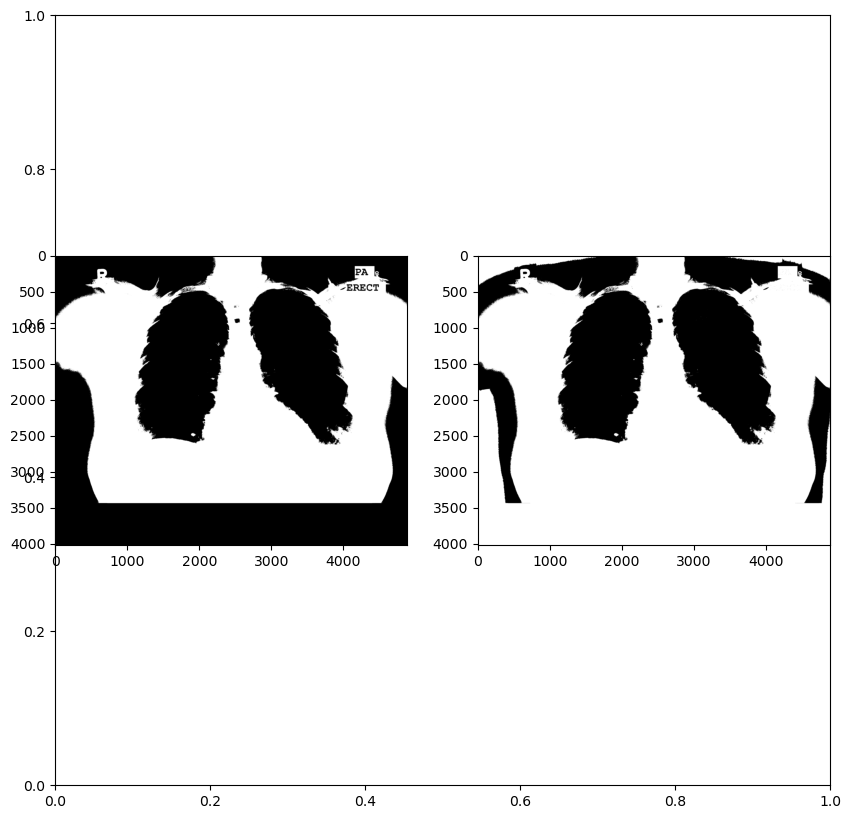

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(binary, cmap='gray')
plt.subplot(1,2, 2)
plt.imshow(binary + np.invert(binary_2), cmap='gray')
plt.show()

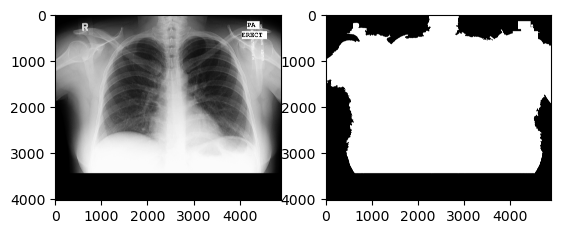

In [13]:
import scipy as sp

from skimage import segmentation, filters

markers = np.zeros_like(image)

markers[image < 10] = 1

markers[image >150] = 2


elevation_map = filters.sobel(image)

watershed_seg = segmentation.watershed(elevation_map, markers)

binary3 = sp.ndimage.binary_fill_holes(watershed_seg-1)


plt.subplot(1,2,1)

plt.imshow(image, cmap='gray')

plt.subplot(1,2, 2)

plt.imshow(binary3, cmap='gray')

plt.show()

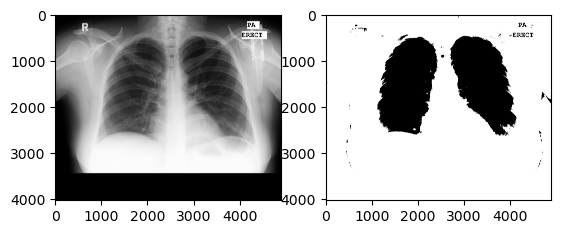

In [25]:
plt.subplot(1,2,1)

plt.imshow(image, cmap='gray')

plt.subplot(1,2, 2)

plt.imshow(binary +np.invert(binary3), cmap='gray')

plt.show()

In [15]:
test = binary +np.invert(binary3)

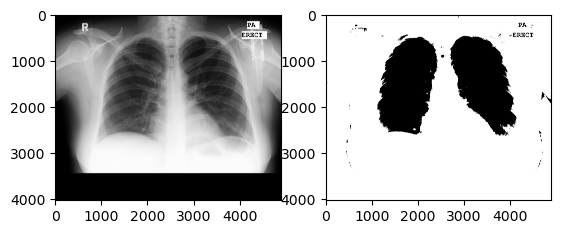

In [16]:
plt.subplot(1,2,1)

plt.imshow(image, cmap='gray')

plt.subplot(1,2, 2)

plt.imshow(test, cmap='gray')

plt.show()

In [36]:
result = skimage.morphology.isotropic_closing(test, 30)

In [34]:
import skimage.morphology

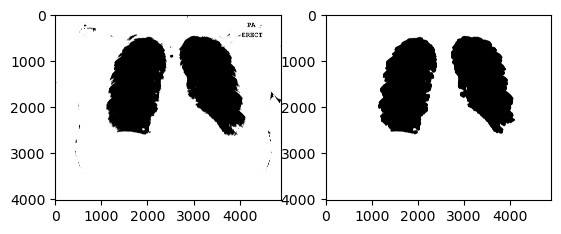

In [37]:
plt.subplot(1,2,1)

plt.imshow(test, cmap='gray')

plt.subplot(1,2, 2)

plt.imshow(result, cmap='gray')

plt.show()